# PRODIGY_ML_01: House Price Prediction using Linear Regression
Implemented a linear regression model using only:
- `GrLivArea` (Square Footage)
- `BedroomAbvGr` (Number of Bedrooms)
- `FullBath` (Number of Bathrooms)

As per the task instructions, only these features are used from the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Import necessary libraries

In [2]:
df = pd.read_csv('train.csv')
df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].describe()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


## Step 2: Load the dataset and view basic info

In [3]:
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].dropna()
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']


## Step 3: Select only the required features and target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Step 4: Handle missing values (if any) and split the data

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Step 5: Train the Linear Regression model

In [6]:
y_pred = regressor.predict(X_test)

## Step 6: Predict and evaluate the model

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 54011.23
R² Score: 0.55


## Step 7: Visualize the predictions vs actual values

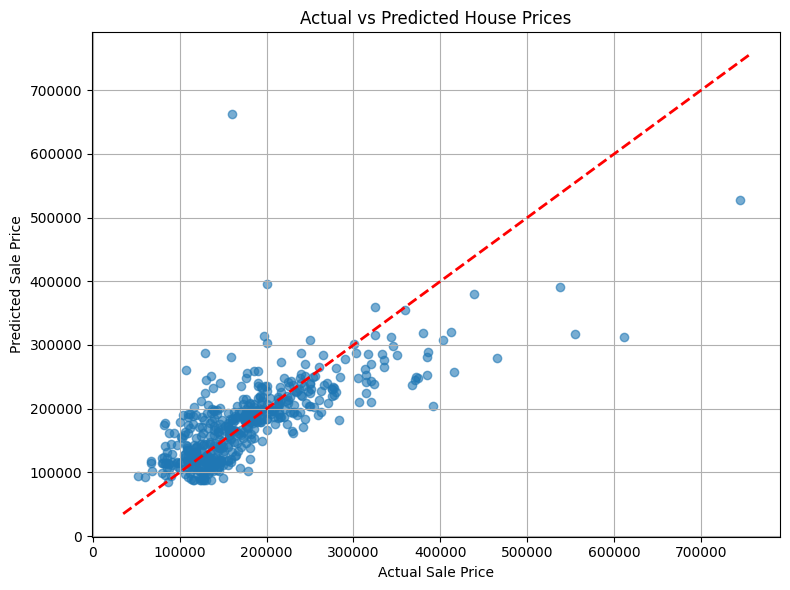

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


